# Notebook about the research done on retrieving data for word2vec embeddings


## Trying to find related words using twitter tweet search api

## Define all base terms for which we want to search tweets for that may come in member profiles

In [1]:
# terms=["Programmer","Coding","Javascript","Cloud Computing","Manager","Finance","Design","Art","Dribbble","Github","Python","Data","Science","Commerce","Machine Learning",\
#       "Engineer","IBM","Chartered Accountant","Figma","Adobe","Music","Audio","Language","Vocabulary","Designer","Coder","Mathematician","Creative","Logic","Logical"]
# terms specially listed for teams app 
terms=["Programmer","Coding","Deep Learning","Cloud Computing","Javascript","Backend","Frontend","Data Science","Dribbble","Github","Machine Learning",\
       "Engineer","Figma","Sketch","Blender","Mathematician","Audio Programming","ReactJS","VueJS","CSS","Design Engineer","Operating System",\
       "Linux","Scripting","Shell Script","Leader"]

In [2]:
terms

['Programmer',
 'Coding',
 'Deep Learning',
 'Cloud Computing',
 'Javascript',
 'Backend',
 'Frontend',
 'Data Science',
 'Dribbble',
 'Github',
 'Machine Learning',
 'Engineer',
 'Figma',
 'Sketch',
 'Blender',
 'Mathematician',
 'Audio Programming',
 'ReactJS',
 'VueJS',
 'CSS',
 'Design Engineer',
 'Operating System',
 'Linux',
 'Scripting',
 'Shell Script',
 'Leader']

### Twitter API sample code

```python
import requests
import os
import json

# To set your enviornment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'


def auth():
    return os.environ.get("BEARER_TOKEN")


def create_url():
    query = "from:twitterdev -is:retweet"
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    tweet_fields = "tweet.fields=author_id"
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(
        query, tweet_fields
    )
    return url


def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


def main():
    bearer_token = auth()
    url = create_url()
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    print(json.dumps(json_response, indent=4, sort_keys=True))


if __name__ == "__main__":
    main()
```

In [3]:
import requests
import os
import json

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

def create_url(query):
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
#     tweet_fields = "tweet.fields=author_id"
    #max_results=100
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&max_results=10".format(
        query
    )
    return url

In [4]:
def auth():
    return "AAAAAAAAAAAAAAAAAAAAAC6vMwEAAAAA5uumFGxBM1e4Kfyfr8E5TJseEZw%3DHV6mjkDp1QrpVm1bpi2yZrvAEkpqhxCK91fGkjl5gevPwtLScM"

```python
# fetch tweet data initial
for i in terms:
    bearer_token = auth()
    url = create_url(i)
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
#     print(json.dumps(json_response, indent=4, sort_keys=True))
    with open("./word_dataset/"+i+'_data.json', 'a') as f:
        json.dump(json_response["data"], f)
```

```python
# fetch more tweet data
def create_url(query,next_token):
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
#     tweet_fields = "tweet.fields=author_id"
    #max_results=100
    if next_token:
        url = "https://api.twitter.com/2/tweets/search/recent?query={}&max_results=100&next_token={}".format(
            query,next_token
        )
    else:
        url = "https://api.twitter.com/2/tweets/search/recent?query={}&max_results=100".format(
            query
        )
    return url

next_token=[i for i in terms]
iters=5
for j in range(iters):
    k=0
    for i in terms:
        bearer_token = auth()
        if(j!=0):
            url = create_url(i,next_token[k])
        else:
            url = create_url(i,None)
        headers = create_headers(bearer_token)
        json_response = connect_to_endpoint(url, headers)
        if(json_response["meta"]["next_token"]):
            next_token[k]=json_response["meta"]["next_token"]
        k+=1
        with open("./word_dataset/"+i+"_data.json", "r+") as file:
            data = json.load(file)
            data.extend(json_response["data"])
            file.seek(0)
            json.dump(data, file)
```

## Start cleaning data then extract keywords using rake or spacy

```python
import re
for i in terms:
    with open("./word_dataset/"+i+"_data.json", "r+") as file:
            data = json.load(file)
            arr=[]
            for k in data:
                # add clean up line here and saved cleaned data somewhere
                final_cleaned = str(re.sub(r"[^a-zA-Z0-9]+", ' ', k["text"]))
                arr.append(final_cleaned)
            file2=open("./word_dataset/"+i+"_cleaned.json","a+")
            json.dump(arr,file2)
```

In [5]:
# str(re.sub(r"[^a-zA-Z0-9]+", ' ', k["text"]))

## Start removing stop words and useless words from sentences 

In [6]:
# !conda install -c conda-forge rake_nltk -y


In [7]:
# !python -c "import nltk; nltk.download('stopwords')"
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'can', 'most', 'the', 'he', 'but', 'some', "won't", "didn't", 'these', "haven't", "it's", 'do', 's', 'itself', 'didn', 'above', 'wasn', 'any', 'while', 'own', 'against', 'now', 've', 'ain', "aren't", 'whom', "should've", 'were', 'between', "you're", "you'll", 'don', 'has', 'its', 'your', 'wouldn', 'where', 'll', "wouldn't", 'you', 'hers', 'as', 'herself', 'very', 'or', 'mustn', 'myself', 'yourselves', 'further', 'during', 're', 'ma', "you'd", 'those', 'only', 'am', 'had', 'each', "that'll", 'under', "couldn't", 'needn', "hadn't", 'if', 'nor', 'a', 'down', 'what', "you've", 'at', 'ours', 'how', 'should', 'her', 'it', 'about', 'being', 'from', 'once', 'few', 'did', 'y', 'weren', 'because', 'that', 'then', "wasn't", 'yours', 'with', 'doesn', 'in', 'other', 't', 'our', 'for', 'mightn', "shouldn't", 'too', 'will', 'before', 'and', "doesn't", 'yourself', 'have', 'into', 'again', 'to', 'when', "weren't", 'up', 'are', 'on', 'themselves', "shan't", 'their', 'who', 'she', "she's", 'having', 'th

## Removed stop words from tweets lets build a pandas dataframe with text

```python
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in terms:
    with open("./cleaned_dataset/"+i+"_cleaned.json", "r+") as file:
        data = json.load(file)
        arr=[]
        for k in data:
            # add clean up line here and saved cleaned data somewhere
            final_cleaned = ' '.join([word for word in k.split() if word not in stop_words])
            arr.append(final_cleaned)
            file2=open("./cleaned_dataset/"+i+"_stopworded.json","w+")
            json.dump(arr,file2)
```        

In [8]:
import pandas as pd

In [9]:
all_text_df=pd.DataFrame()

In [10]:
text_db=[]
for i in terms:
     with open("./cleaned_dataset/"+i+"_stopworded.json", "r+") as file:
        data = json.load(file)
        for k in data:
            text_db.append(k)

In [11]:
len(text_db)

10455

In [12]:
all_text_df["text"]=text_db

In [13]:
all_text_df

,text
0,gekido SykooSam I must born programmer
1,RT PR0GRAMMERHUM0R Every programmer like https...
2,RT carrotpharma Join welcoming Pharma Consulta...
3,RT motherofnodejs Never programming coding pro...
4,RT motherofnodejs Never programming coding pro...
...,...
10450,RT toryboypierce Former SNP leader Alec Salmon...
10451,RT Fereeha PPP leader TalpurTaimur said snake ...
10452,RT nowthisnews HAPPENING NOW SCHUMER SPEAKS TO...
10453,RT waller73 Just year leader done LiverpoolMayor


In [14]:
all_text_df.to_csv("tweet_text_db.csv")

In [15]:
# !conda install -c anaconda gensim -y

In [16]:
import nltk

In [17]:
all_text_df['tokenized'] = all_text_df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [18]:
all_text_df

,text,tokenized
0,gekido SykooSam I must born programmer,"[gekido, SykooSam, I, must, born, programmer]"
1,RT PR0GRAMMERHUM0R Every programmer like https...,"[RT, PR0GRAMMERHUM0R, Every, programmer, like,..."
2,RT carrotpharma Join welcoming Pharma Consulta...,"[RT, carrotpharma, Join, welcoming, Pharma, Co..."
3,RT motherofnodejs Never programming coding pro...,"[RT, motherofnodejs, Never, programming, codin..."
4,RT motherofnodejs Never programming coding pro...,"[RT, motherofnodejs, Never, programming, codin..."
...,...,...
10450,RT toryboypierce Former SNP leader Alec Salmon...,"[RT, toryboypierce, Former, SNP, leader, Alec,..."
10451,RT Fereeha PPP leader TalpurTaimur said snake ...,"[RT, Fereeha, PPP, leader, TalpurTaimur, said,..."
10452,RT nowthisnews HAPPENING NOW SCHUMER SPEAKS TO...,"[RT, nowthisnews, HAPPENING, NOW, SCHUMER, SPE..."
10453,RT waller73 Just year leader done LiverpoolMayor,"[RT, waller73, Just, year, leader, done, Liver..."


In [19]:
from gensim.models import Word2Vec

In [20]:
model = Word2Vec(all_text_df["tokenized"], min_count=1)


In [23]:
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
# print(words)
# access vector for one word
print(model['python'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=28249, size=100, alpha=0.025)
[-0.05092476 -0.6174708  -0.21795674  0.89006746  0.20498055  0.14906953
  0.44968066 -0.9787879  -0.5048926   0.8400979  -1.0731926  -0.29330224
  0.11087629 -0.43687248  0.5864134  -0.44023415 -0.08625937  0.05152275
 -0.283713   -0.53310287  0.3212956   0.01345026  0.34741563  0.7295249
  0.12459099  0.6573796   0.8155025  -0.8058815  -0.7211057  -0.39866284
  0.4931659   0.32254848 -0.30149272  0.35740596 -0.42182735  0.5632865
 -0.9083596   0.48815355 -0.13788585  0.3861491   0.8422098  -0.7323714
  0.06066409 -1.1665702  -0.7918566   0.62904584 -0.21194558  0.6003256
  0.09010583  0.24248448  0.71595156 -0.89056176 -0.0456437  -1.076717
  0.05742458 -0.2795264   0.1251021   0.11397291 -0.7738054  -0.09502061
  0.5185516  -0.3209636   0.06408984 -0.01651498 -0.35370508 -0.25576058
 -0.35023642 -0.86111003 -0.3011318  -0.20085451 -0.1592278   0.71849966
 -1.0435585   0.34261948  0.5263774   0.1505777   1.093924    1.4361805
  1.1169804  

<ipython-input-23-793e5745a1c5>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['python'])


Word2Vec(vocab=28249, size=100, alpha=0.025)


In [25]:

X = model[model.wv.vocab]


<ipython-input-25-c60322eee7e8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [29]:

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [31]:
# pyplot.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
# 	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
# pyplot.show()

In [175]:
# model.wv.vocab
terms=["Programmer","Coding","Deep","Learning","Cloud","Computing","Javascript","Backend","Frontend","Data" ,"Science","Dribbble","Github","Machine","Learning",\
       "Engineer","Figma","Sketch","Blender","Mathematician","Audio","Programming","ReactJS","VueJS","CSS","Design","Engineer","Operating","System",\
       "Linux","Scripting","Shell","Script","Leader","Nodejs","Django","Web","google","java","Flutter","material","bootstrap","Rust","Julia","Engine","html","open","source","aws","media","apple","logic"]
terms=[x.lower() for x in terms]
X=model[terms]

<ipython-input-175-d45d5651ae16>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[terms]


In [176]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(X)

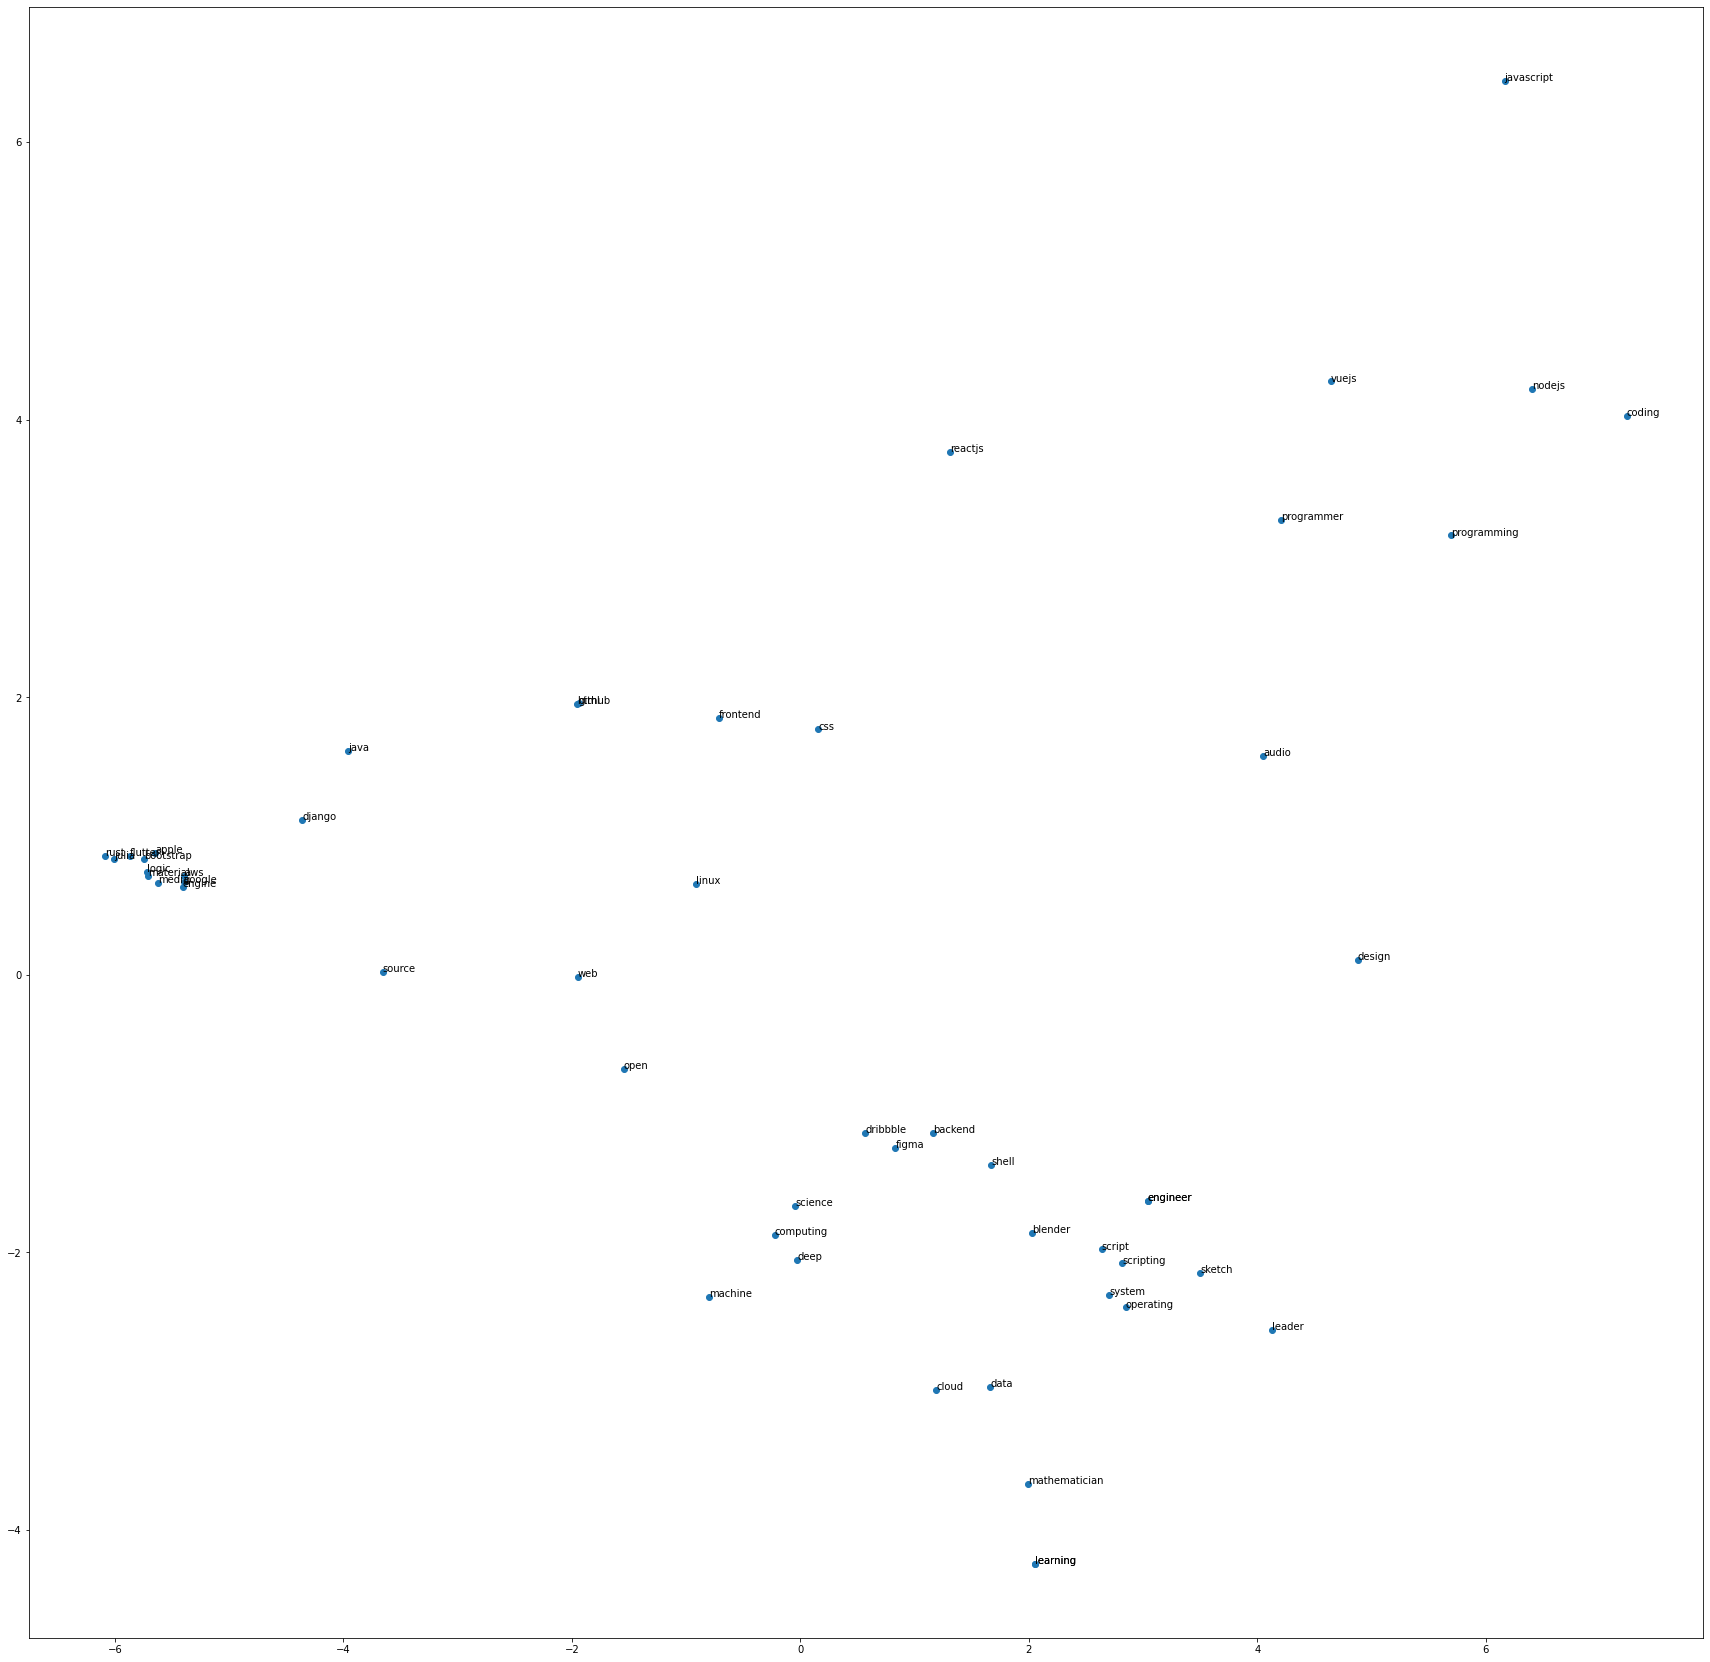

In [177]:

width,height=30,30
pyplot.figure(figsize=(width,height))   
pyplot.scatter(result[:, 0], result[:, 1])
words = list(terms)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Demo on accurate words


<ipython-input-180-b45a16880913>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[terms]


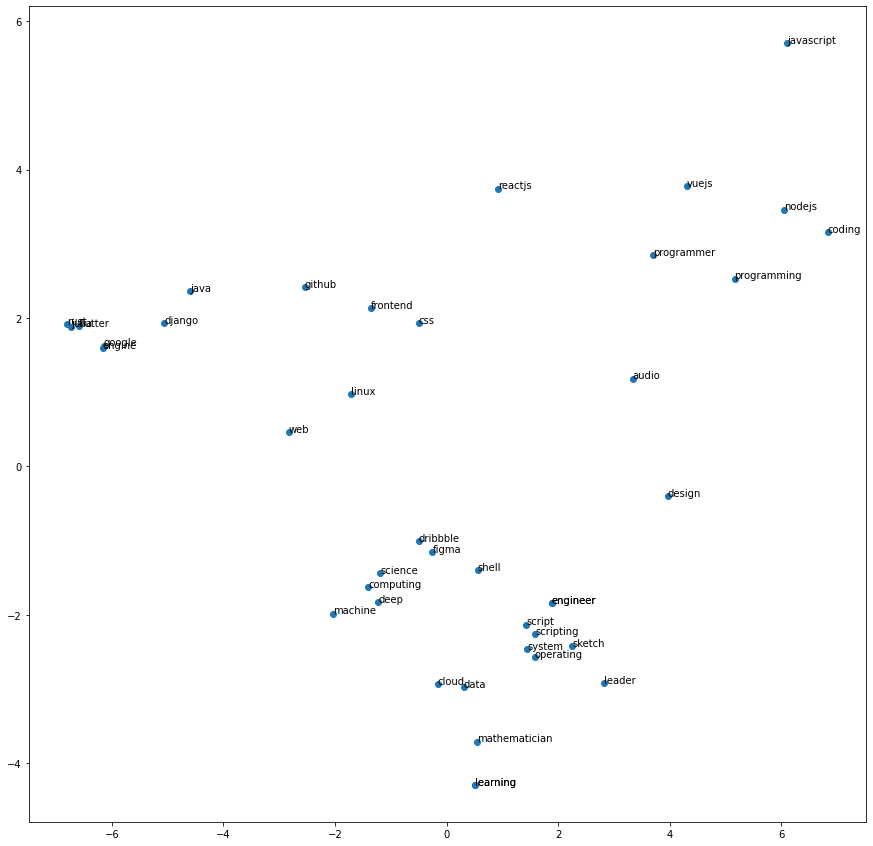

In [180]:
terms=["Programmer","Coding","Deep","Learning","Cloud","Computing","Javascript","Frontend","Data" ,"Science","Dribbble","Github","Machine","Learning",\
       "Engineer","Figma","Sketch","Mathematician","Audio","Programming","ReactJS","VueJS","CSS","Design","Engineer","Operating","System",\
       "Linux","Scripting","Shell","Script","Leader","Nodejs","Django","Web","google","java","Flutter","Rust","Julia","Engine"]
terms=[x.lower() for x in terms]
X=model[terms]

from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(X)

width,height=15,15
pyplot.figure(figsize=(width,height))   
pyplot.scatter(result[:, 0], result[:, 1])
words = list(terms)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [198]:
from sklearn.cluster import KMeans

In [199]:
terms=["Programmer","Coding","Deep","Learning","Cloud","Computing","Javascript","Frontend","Data" ,"Science","Dribbble","Github","Machine","Learning",\
       "Engineer","Figma","Sketch","Mathematician","Audio","Programming","ReactJS","VueJS","CSS","Design","Engineer","Operating","System",\
       "Linux","Scripting","Shell","Script","Leader","Nodejs","Django","Web","google","java","Flutter","Rust","Julia","Engine","html"]
terms=[x.lower() for x in terms]
X=model[terms]

<ipython-input-199-45cb6ece4c52>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[terms]


In [200]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

In [201]:
kmeans.labels_

array([1, 1, 0, 0, 0, 0, 1, 5, 0, 0, 0, 5, 0, 0, 4, 0, 4, 4, 3, 1, 5, 1,
       5, 3, 4, 4, 4, 5, 4, 4, 4, 4, 1, 2, 5, 2, 2, 2, 2, 2, 2, 5],
      dtype=int32)

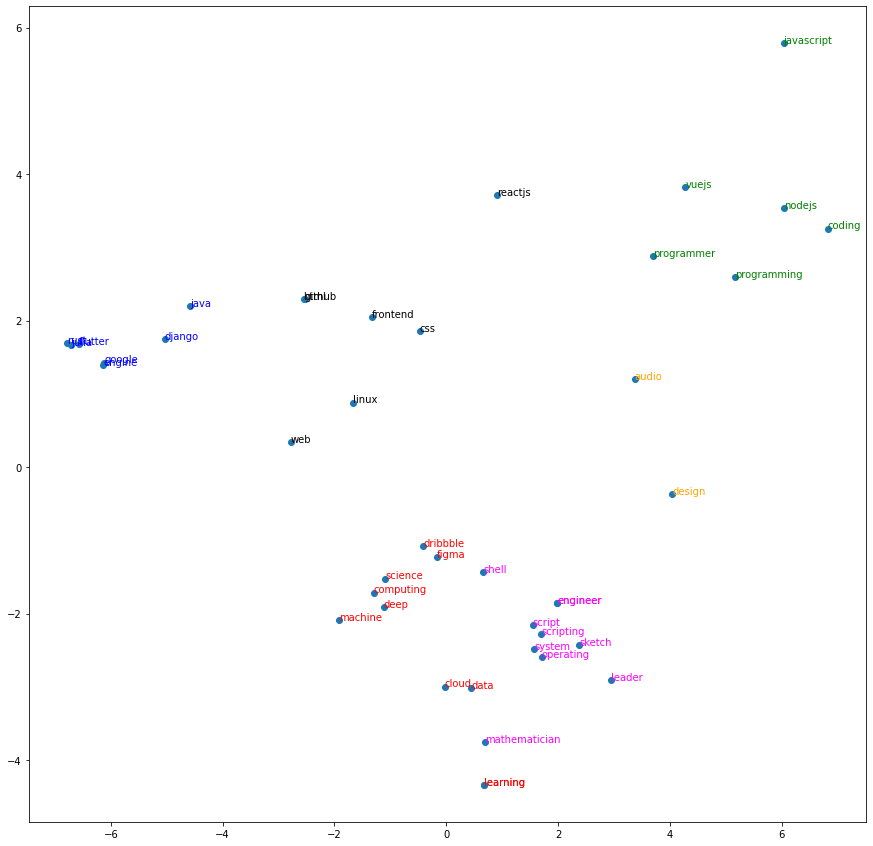

In [202]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(X)

colordict={
    0:"red",
    1:"green",
    2:"blue",
    3:"orange",
    4:"magenta",
    5:"black"
}

width,height=15,15
pyplot.figure(figsize=(width,height))   
pyplot.scatter(result[:, 0], result[:, 1])
words = list(terms)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]),color=colordict[kmeans.labels_[i]])
pyplot.savefig("kmeansclustered.png")
pyplot.show()



## Lets try for less clusters

<ipython-input-205-5932f33732b1>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[terms]


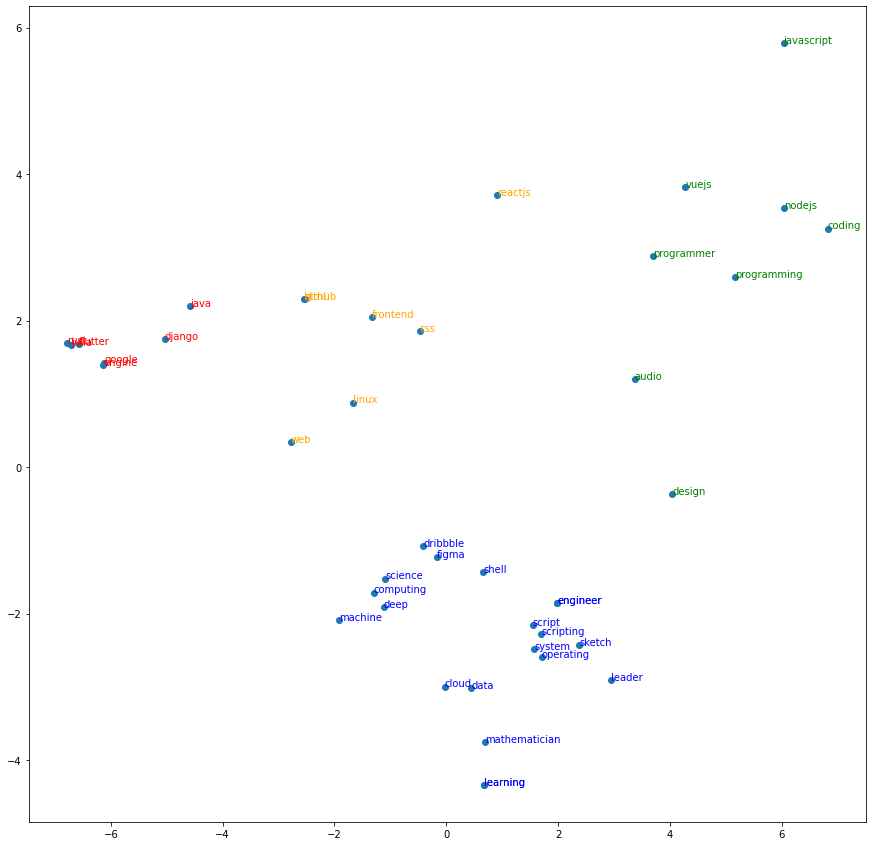

In [205]:
terms=["Programmer","Coding","Deep","Learning","Cloud","Computing","Javascript","Frontend","Data" ,"Science","Dribbble","Github","Machine","Learning",\
       "Engineer","Figma","Sketch","Mathematician","Audio","Programming","ReactJS","VueJS","CSS","Design","Engineer","Operating","System",\
       "Linux","Scripting","Shell","Script","Leader","Nodejs","Django","Web","google","java","Flutter","Rust","Julia","Engine","html"]
terms=[x.lower() for x in terms]
X=model[terms]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(X)

colordict={
    0:"red",
    1:"green",
    2:"blue",
    3:"orange",
    4:"magenta",
    5:"black"
}

width,height=15,15
pyplot.figure(figsize=(width,height))   
pyplot.scatter(result[:, 0], result[:, 1])
words = list(terms)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]),color=colordict[kmeans.labels_[i]])
pyplot.savefig("kmeansclustered2.png")
pyplot.show()

<ipython-input-206-3c9b9d3a8bac>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[terms]


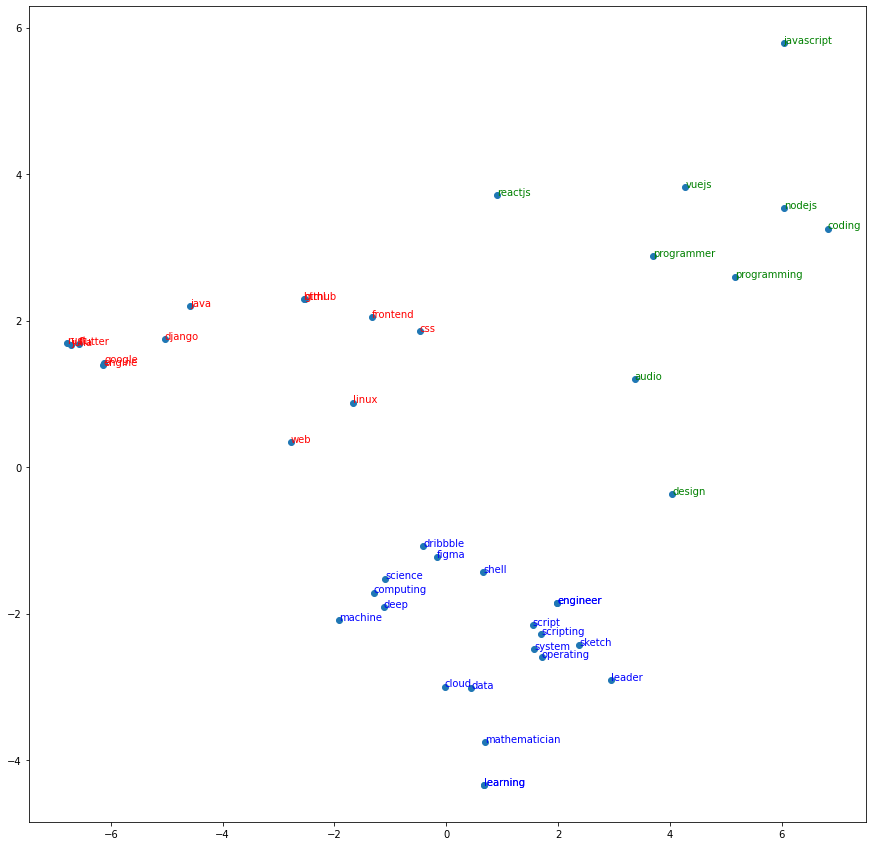

In [206]:
terms=["Programmer","Coding","Deep","Learning","Cloud","Computing","Javascript","Frontend","Data" ,"Science","Dribbble","Github","Machine","Learning",\
       "Engineer","Figma","Sketch","Mathematician","Audio","Programming","ReactJS","VueJS","CSS","Design","Engineer","Operating","System",\
       "Linux","Scripting","Shell","Script","Leader","Nodejs","Django","Web","google","java","Flutter","Rust","Julia","Engine","html"]
terms=[x.lower() for x in terms]
X=model[terms]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(X)

colordict={
    0:"red",
    1:"green",
    2:"blue",
    3:"orange",
    4:"magenta",
    5:"black"
}

width,height=15,15
pyplot.figure(figsize=(width,height))   
pyplot.scatter(result[:, 0], result[:, 1])
words = list(terms)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]),color=colordict[kmeans.labels_[i]])
pyplot.savefig("kmeansclustered3.png")
pyplot.show()

In [1]:
import pandas as pd
df=pd.DataFrame(columns=["_id","fullname","email","role","specialities","organisation","rolevec","sp1","sp2","sp3"])

In [2]:
df

,_id,fullname,email,role,specialities,organisation,rolevec,sp1,sp2,sp3


In [8]:
a={"fullname": "Kaushal Patil",
                "email": "kaushalpatil10@gmail.com",
                "password": "password123@",
                "role": "programmer",
                "specialities": ["python", "javascript", "backend", "frontend", "deeplearning"],
                "organisation": "Ahmedabad University",
                "pipelined": 0}

In [9]:
a

{'fullname': 'Kaushal Patil',
 'email': 'kaushalpatil10@gmail.com',
 'password': 'password123@',
 'role': 'programmer',
 'specialities': ['python',
  'javascript',
  'backend',
  'frontend',
  'deeplearning'],
 'organisation': 'Ahmedabad University',
 'pipelined': 0}

In [10]:
from gensim.models import Word2Vec
new_model = Word2Vec.load('model.bin')

In [11]:
df.loc[len(df.index)] = ["23523hgiufy345",a["fullname"],a["email"],a["role"],a["specialities"],a["organisation"],new_model[a["role"]],new_model[a["specialities"][0]],new_model[a["specialities"][2]],new_model[a["specialities"][2]]]  

<ipython-input-11-b86b3aefc347>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  df.loc[len(df.index)] = ["23523hgiufy345",a["fullname"],a["email"],a["role"],a["specialities"],a["organisation"],new_model[a["role"]],new_model[a["specialities"][0]],new_model[a["specialities"][2]],new_model[a["specialities"][2]]]


In [12]:
df

,_id,fullname,email,role,specialities,organisation,rolevec,sp1,sp2,sp3
0,23523hgiufy345,Kaushal Patil,kaushalpatil10@gmail.com,programmer,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[-0.21826054, -1.1970179, -0.34079888, 1.73621...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...","[-0.08466415, -1.1211591, 0.100969754, 1.30290..."


In [18]:
import numpy as np
df.loc[0]["sp2"]@df.loc[0]["sp3"]/((np.linalg.norm(df.loc[0]["sp2"]))*(np.linalg.norm(df.loc[0]["sp3"])))

0.99999994

In [24]:
new_model["frontend"]@new_model["data"]/(np.linalg.norm(new_model["frontend"])*(np.linalg.norm(new_model["data"])))
                                   

<ipython-input-24-4ae812336253>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  new_model["frontend"]@new_model["data"]/(np.linalg.norm(new_model["frontend"])*(np.linalg.norm(new_model["data"])))


0.8000029

In [25]:
new_model["frontend"]@new_model["css"]/(np.linalg.norm(new_model["frontend"])*(np.linalg.norm(new_model["css"])))
                                   

<ipython-input-25-e85d1b0dda63>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  new_model["frontend"]@new_model["css"]/(np.linalg.norm(new_model["frontend"])*(np.linalg.norm(new_model["css"])))


0.99077016

In [28]:
new_model["deep"]@new_model["data"]/(np.linalg.norm(new_model["deep"])*(np.linalg.norm(new_model["data"])))
                                   

<ipython-input-28-5ec9453f90f8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  new_model["deep"]@new_model["data"]/(np.linalg.norm(new_model["deep"])*(np.linalg.norm(new_model["data"])))


0.98571414

In [29]:
new_model["javascript"]@new_model["nodejs"]/(np.linalg.norm(new_model["javascript"])*(np.linalg.norm(new_model["nodejs"])))

<ipython-input-29-9430caed5c4f>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  new_model["javascript"]@new_model["nodejs"]/(np.linalg.norm(new_model["javascript"])*(np.linalg.norm(new_model["nodejs"])))


0.95041203

In [33]:
new_model["javascript"]@new_model["ml"]/(np.linalg.norm(new_model["javascript"])*(np.linalg.norm(new_model["ml"])))

<ipython-input-33-41dd180a5223>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  new_model["javascript"]@new_model["ml"]/(np.linalg.norm(new_model["javascript"])*(np.linalg.norm(new_model["ml"])))


0.76356983

In [34]:
new_model["python"]@new_model["ml"]/(np.linalg.norm(new_model["python"])*(np.linalg.norm(new_model["ml"])))

<ipython-input-34-e973c0006ccc>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  new_model["python"]@new_model["ml"]/(np.linalg.norm(new_model["python"])*(np.linalg.norm(new_model["ml"])))


0.8316093

In [39]:
try:
    sp1=new_model["fullstack"]
except:
    sp1=np.zeros(100,dtype="float32")

<ipython-input-39-8ee701b1ce95>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sp1=new_model["fullstack"]


In [41]:
len(sp1),len(new_model["js"])

<ipython-input-41-f225e55e8b01>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  len(sp1),len(new_model["js"])


(100, 100)

In [42]:
# start working on computing similarity score and finding similar users

In [43]:
# 2 functions 
# 1 -> compute full similarity column
# 2 -> compute missing values in column

# 3 -> return descending sorted max n rows.



In [56]:
df.append(pd.Series(), ignore_index=True)

<ipython-input-56-b834e2dd3759>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df.append(pd.Series(), ignore_index=True)


,_id,fullname,email,role,specialities,organisation,rolevec,sp1,sp2,sp3
0,23523hgiufy345,Kaushal Patil,kaushalpatil10@gmail.com,programmer,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[-0.21826054, -1.1970179, -0.34079888, 1.73621...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...","[-0.08466415, -1.1211591, 0.100969754, 1.30290..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.columns

Index(['_id', 'fullname', 'email', 'role', 'specialities', 'organisation',
       'rolevec', 'sp1', 'sp2', 'sp3'],
      dtype='object')

In [57]:
df=df.append(pd.Series(), ignore_index=True)

<ipython-input-57-95f6af3c420b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df=df.append(pd.Series(), ignore_index=True)


In [58]:
df

,_id,fullname,email,role,specialities,organisation,rolevec,sp1,sp2,sp3
0,23523hgiufy345,Kaushal Patil,kaushalpatil10@gmail.com,programmer,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[-0.21826054, -1.1970179, -0.34079888, 1.73621...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...","[-0.08466415, -1.1211591, 0.100969754, 1.30290..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.loc[1]["_id"]="Hello"

In [60]:
df

,_id,fullname,email,role,specialities,organisation,rolevec,sp1,sp2,sp3
0,23523hgiufy345,Kaushal Patil,kaushalpatil10@gmail.com,programmer,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[-0.21826054, -1.1970179, -0.34079888, 1.73621...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...","[-0.08466415, -1.1211591, 0.100969754, 1.30290..."
1,Hello,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd
df=pd.read_pickle("qupiddf.pickle")

In [4]:
df.to_pickle("qupiddf.pickle")

In [70]:
df=pd.read_pickle("qupiddf.pickle")

In [71]:
df

,_id,fullname,email,role,specialities,organisation,rolevec,sp1,sp2,sp3,simaofFOAUHfbFASF7^ASFBKjAf,sim603953ab4f8181a538bf3088,sim603aa29d635cc066c2f64845
0,60354924a73028d50dc270c1,Kaushal Patil,kaushalpatil10@gmail.com,fullstack,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.0061101005, -1.2225759, -0.75153536, 1.825...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...",0.691845,1.000000,0.632247
1,6039537c5834b6c50f9eb1ca,Kaushal Patil123,kaushalpatil20@gmail.com,fullstack,"[python, javascript]",Bright Day School,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.0061101005, -1.2225759, -0.75153536, 1.825...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.469316,0.835824,0.480518
2,603a517d4c279eb11e503156,Kaushal Patil,kaushalpatil1@gmail.com,github,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[-0.0014030047, -0.45194963, -0.16669936, 0.63...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.0061101005, -1.2225759, -0.75153536, 1.825...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...",0.942651,0.678966,0.957219
3,603a517d4c279eb11e503156,Kaushal Patil,kaushalpatil1@gmail.com,github,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[-0.0014030047, -0.45194963, -0.16669936, 0.63...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.0061101005, -1.2225759, -0.75153536, 1.825...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...",NaN,0.678966,0.957219
4,603aa2c6635cc066c2f64846,Kaushal Patil,kaushalpatil10@gmail.com,frontend,"[html, frontend, css, frontend, deeplearning]",Ahmedabad University,"[-0.08158892, -0.692594, -0.19291721, 0.814151...","[-0.00849916, -0.44909707, -0.12369492, 0.7232...","[-0.08158892, -0.692594, -0.19291721, 0.814151...","[-0.024017006, -0.7735428, -0.21209157, 0.9854...",NaN,0.645001,0.992937


In [7]:
df.rolevec[2]

array([-0.001403  , -0.45194963, -0.16669936,  0.63499016,  0.08478376,
        0.03481857,  0.39913702, -0.7466582 , -0.3032124 ,  0.63338494,
       -0.8274148 , -0.2855259 ,  0.13042033, -0.27515888,  0.4463916 ,
       -0.29301688, -0.07237551,  0.10652886, -0.19618857, -0.36368096,
        0.12442947,  0.07019225,  0.3395891 ,  0.4859414 ,  0.16561748,
        0.5018237 ,  0.70610505, -0.60886174, -0.5170562 , -0.2844598 ,
        0.4000326 ,  0.28748867, -0.14125702,  0.19569807, -0.26342186,
        0.5680658 , -0.68177986,  0.33837482, -0.09784986,  0.27767873,
        0.6168021 , -0.59591615,  0.11247995, -0.9422495 , -0.5836085 ,
        0.5292175 , -0.08084504,  0.46407434, -0.0090061 ,  0.20216566,
        0.537383  , -0.58576494,  0.0309124 , -0.79104424,  0.13208473,
       -0.11051882,  0.02586986,  0.11022395, -0.54076827, -0.05043869,
        0.38005522, -0.25846425,  0.04897328,  0.01348628, -0.28596124,
       -0.19722958, -0.2568257 , -0.5314213 , -0.2689687 , -0.17

In [11]:
artfuser={
    "_id":"aofFOAUHfbFASF7^ASFBKjAf",
    "rolevec":new_model["programmer"],
    "sp1":new_model["backend"],
    "sp2":new_model["javascript"],
    "sp3":new_model["figma"]
}

<ipython-input-11-e10bac275912>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  "rolevec":new_model["programmer"],
<ipython-input-11-e10bac275912>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  "sp1":new_model["backend"],
<ipython-input-11-e10bac275912>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  "sp2":new_model["javascript"],
<ipython-input-11-e10bac275912>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  "sp3":new_model["figma"]


In [12]:
artfuser


{'_id': 'aofFOAUHfbFASF7^ASFBKjAf',
 'rolevec': array([-0.21826054, -1.1970179 , -0.34079888,  1.7362139 ,  0.47743067,
         0.47512758,  0.78480357, -1.8740921 , -1.0570593 ,  1.5459448 ,
        -1.9833295 , -0.34382626,  0.11375822, -1.0349205 ,  1.0625991 ,
        -0.8835869 , -0.13555683, -0.04730484, -0.5364328 , -1.2084724 ,
         0.9120348 , -0.0672913 ,  0.59174556,  1.5128882 ,  0.01672041,
         1.186795  ,  1.4787254 , -1.559008  , -1.4609153 , -0.75046307,
         0.760025  ,  0.59996265, -0.676142  ,  0.7355927 , -0.883728  ,
         0.72280604, -1.791321  ,  1.0240897 , -0.2841505 ,  0.8799079 ,
         1.6065651 , -1.2410377 , -0.0329954 , -1.9809874 , -1.4455729 ,
         1.0072455 , -0.5150779 ,  1.1680132 ,  0.3239376 ,  0.43267947,
         1.2677063 , -1.8051889 , -0.30898657, -2.1715167 , -0.03421316,
        -0.6937069 ,  0.3678876 ,  0.11840506, -1.5839311 , -0.13518107,
         0.9850996 , -0.5519521 ,  0.12555206, -0.12207137, -0.7352672 ,
    

In [14]:
import numpy as np
np.array(df.loc[1]["sp1"])

array([-0.05092476, -0.6174708 , -0.21795674,  0.89006746,  0.20498055,
        0.14906953,  0.44968066, -0.9787879 , -0.5048926 ,  0.8400979 ,
       -1.0731926 , -0.29330224,  0.11087629, -0.43687248,  0.5864134 ,
       -0.44023415, -0.08625937,  0.05152275, -0.283713  , -0.53310287,
        0.3212956 ,  0.01345026,  0.34741563,  0.7295249 ,  0.12459099,
        0.6573796 ,  0.8155025 , -0.8058815 , -0.7211057 , -0.39866284,
        0.4931659 ,  0.32254848, -0.30149272,  0.35740596, -0.42182735,
        0.5632865 , -0.9083596 ,  0.48815355, -0.13788585,  0.3861491 ,
        0.8422098 , -0.7323714 ,  0.06066409, -1.1665702 , -0.7918566 ,
        0.62904584, -0.21194558,  0.6003256 ,  0.09010583,  0.24248448,
        0.71595156, -0.89056176, -0.0456437 , -1.076717  ,  0.05742458,
       -0.2795264 ,  0.1251021 ,  0.11397291, -0.7738054 , -0.09502061,
        0.5185516 , -0.3209636 ,  0.06408984, -0.01651498, -0.35370508,
       -0.25576058, -0.35023642, -0.86111003, -0.3011318 , -0.20

In [19]:
def computesim(df,artfuser):
    import numpy as np
    mag=np.linalg.norm
    # df["sim"+artfuser["_id"]]=np.NaN
    if df["sim"+artfuser["_id"]].empty:
        for index,row in df.iterrows():
            if row["sim"+artfuser["_id"]]==np.NaN:
                df.at[index,"sim"+artfuser["_id"]]=(row["rolevec"]@artfuser["rolevec"]/(mag(row["rolevec"])*mag(artfuser["rolevec"]))+\
                     row["sp1"]@artfuser["sp1"]/(mag(row["sp1"])*mag(artfuser["sp1"]))+\
                     row["sp2"]@artfuser["sp2"]/(mag(row["sp2"])*mag(artfuser["sp2"]))+\
                     row["sp3"]@artfuser["sp3"]/(mag(row["sp3"])*mag(artfuser["sp3"])))/4
    else:
        for index,row in df.iterrows():
            df.at[index,"sim"+artfuser["_id"]]=(row["rolevec"]@artfuser["rolevec"]/(mag(row["rolevec"])*mag(artfuser["rolevec"]))+\
                 row["sp1"]@artfuser["sp1"]/(mag(row["sp1"])*mag(artfuser["sp1"]))+\
                 row["sp2"]@artfuser["sp2"]/(mag(row["sp2"])*mag(artfuser["sp2"]))+\
                 row["sp3"]@artfuser["sp3"]/(mag(row["sp3"])*mag(artfuser["sp3"])))/4
    return df

In [20]:
# df["sim"+artfuser["id"]]=((df["rolevec"]@artfuser["rolevec"]/(mag(df["rolevec"])*mag(artfuser["rolevec"])))\
#                           +(df["sp1"]@artfuser["sp1"]/(mag(df["sp1"])*mag(artfuser["sp1"])))+\
#                           (df["sp2"]@artfuser["sp2"]/(mag(df["sp2"])*mag(artfuser["sp2"])))+\
#                          (df["sp3"]@artfuser["sp3"]/(mag(df["sp3"])*mag(artfuser["sp3"]))))/4

In [21]:
df=computesim(df,artfuser)

In [225]:
df.to_pickle("qupiddf.pickle")

In [22]:
df

,_id,fullname,email,role,specialities,organisation,rolevec,sp1,sp2,sp3,simaofFOAUHfbFASF7^ASFBKjAf
0,60354924a73028d50dc270c1,Kaushal Patil,kaushalpatil10@gmail.com,fullstack,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.0061101005, -1.2225759, -0.75153536, 1.825...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...",0.691845
1,6039537c5834b6c50f9eb1ca,Kaushal Patil123,kaushalpatil20@gmail.com,fullstack,"[python, javascript]",Bright Day School,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.0061101005, -1.2225759, -0.75153536, 1.825...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.469316
2,603a517d4c279eb11e503156,Kaushal Patil,kaushalpatil1@gmail.com,github,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[-0.0014030047, -0.45194963, -0.16669936, 0.63...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.0061101005, -1.2225759, -0.75153536, 1.825...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...",0.942651
3,603a517d4c279eb11e503156,Kaushal Patil,kaushalpatil1@gmail.com,github,"[python, javascript, backend, frontend, deeple...",Ahmedabad University,"[-0.0014030047, -0.45194963, -0.16669936, 0.63...","[-0.050924763, -0.6174708, -0.21795674, 0.8900...","[-0.0061101005, -1.2225759, -0.75153536, 1.825...","[-0.08466415, -1.1211591, 0.100969754, 1.30290...",0.942651


In [59]:
a={}
columns=["_id","fullname","email","role","specialities","organisation"]
a[1]=df.nlargest(5,columns=["sim"+artfuser["_id"]])[columns].to_dict(orient="records")

In [60]:
a

{1: [{'_id': '603a517d4c279eb11e503156',
   'fullname': 'Kaushal Patil',
   'email': 'kaushalpatil1@gmail.com',
   'role': 'github',
   'specialities': ['python',
    'javascript',
    'backend',
    'frontend',
    'deeplearning'],
   'organisation': 'Ahmedabad University'},
  {'_id': '603a517d4c279eb11e503156',
   'fullname': 'Kaushal Patil',
   'email': 'kaushalpatil1@gmail.com',
   'role': 'github',
   'specialities': ['python',
    'javascript',
    'backend',
    'frontend',
    'deeplearning'],
   'organisation': 'Ahmedabad University'},
  {'_id': '60354924a73028d50dc270c1',
   'fullname': 'Kaushal Patil',
   'email': 'kaushalpatil10@gmail.com',
   'role': 'fullstack',
   'specialities': ['python',
    'javascript',
    'backend',
    'frontend',
    'deeplearning'],
   'organisation': 'Ahmedabad University'},
  {'_id': '6039537c5834b6c50f9eb1ca',
   'fullname': 'Kaushal Patil123',
   'email': 'kaushalpatil20@gmail.com',
   'role': 'fullstack',
   'specialities': ['python', 'jav

In [40]:
import json
b=json.loads(a["1"])

dict

In [67]:
a["hello"]=[1,2,3,4]

In [68]:
import random
list4shuffle=a["hello"]
random.shuffle(list4shuffle)
a["hello"]=list4shuffle

In [69]:
a["hello"],list4shuffle

([3, 1, 2, 4], [3, 1, 2, 4])